# **LSTM Exercise**

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [2]:
dataframe = pd.read_csv('/content/traffic (1).csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


## Normalize the dataset

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

19058 9388


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


## Fit the LSTM

In [8]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)


Epoch 1/100
1906/1906 - 5s - 2ms/step - loss: 0.0111
Epoch 2/100
1906/1906 - 5s - 2ms/step - loss: 0.0013
Epoch 3/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 4/100
1906/1906 - 6s - 3ms/step - loss: 0.0013
Epoch 5/100
1906/1906 - 3s - 2ms/step - loss: 0.0013
Epoch 6/100
1906/1906 - 5s - 2ms/step - loss: 0.0013
Epoch 7/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 8/100
1906/1906 - 5s - 3ms/step - loss: 0.0013
Epoch 9/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 10/100
1906/1906 - 5s - 3ms/step - loss: 0.0013
Epoch 11/100
1906/1906 - 4s - 2ms/step - loss: 0.0013
Epoch 12/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 13/100
1906/1906 - 5s - 3ms/step - loss: 0.0013
Epoch 14/100
1906/1906 - 6s - 3ms/step - loss: 0.0013
Epoch 15/100
1906/1906 - 5s - 2ms/step - loss: 0.0013
Epoch 16/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 17/100
1906/1906 - 4s - 2ms/step - loss: 0.0013
Epoch 18/100
1906/1906 - 3s - 1ms/step - loss: 0.0013
Epoch 19/100
1906/1906 - 5s - 3ms/ste

## Make preductuion and evaluatuin matrix.

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Score: 5.61 RMSE
Test Score: 3.00 RMSE


## Visualize the result

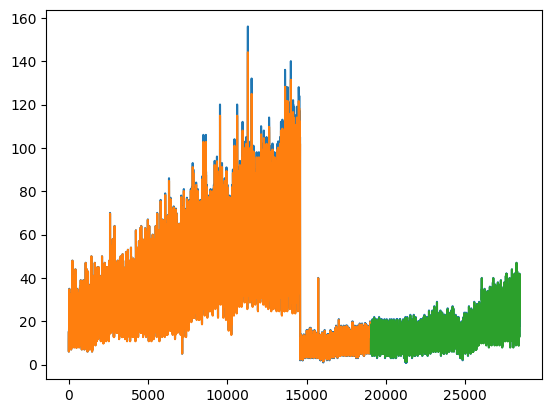

In [10]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Well done** :)